# Predicting Car Prices by using the k-nearest neighbors algorithm

In this project, we will predict a car's market price by using its attributes and applying the k-nearest neighbors algorithm. The date comes from https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data and contains technical information on various cars such as the weight of the car or the miles per gallon. Below we explain the data in more details:

- **symboling**: values from -3 to 3 intctemented by 1, its insurance risk rating, where 3 means that the car is risky and -3 that it is safe.
- **normalized-losses**: continous from 65 to 256, normalized value of relative average loss payment per insured vehicle year.
- **make**: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo 
- **fuel-type**: diesel, gas. 
- **aspiration**: std, turbo. 
- **num-of-doors**: four, two. 
- **body-style**: hardtop, wagon, sedan, hatchback, convertible. 
- **drive-wheels**: 4wd, fwd, rwd. 
- **engine-location**: front, rear. 
- **wheel-base**: continuous from 86.6 120.9. 
- **length**: continuous from 141.1 to 208.1. 
- **width**: continuous from 60.3 to 72.3. 
- **height**: continuous from 47.8 to 59.8. 
- **curb-weight**: continuous from 1488 to 4066. 
- **engine-type**: dohc, dohcv, l, ohc, ohcf, ohcv, rotor. 
- **num-of-cylinders**: eight, five, four, six, three, twelve, two. 
- **engine-size**: continuous from 61 to 326. 
- **fuel-system**: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi. 
- **bore**: continuous from 2.54 to 3.94. 
- **stroke**: continuous from 2.07 to 4.17. 
- **compression-ratio**: continuous from 7 to 23. 
- **horsepower**: continuous from 48 to 288. 
- **peak-rpm**: continuous from 4150 to 6600. 
- **city-mpg**: continuous from 13 to 49. 
- **highway-mpg**: continuous from 16 to 54. 
- **price**: continuous from 5118 to 45400.

Let's import the libraries and explore the data!

## The Data Set exploration

In [52]:
import  pandas as pd
import  numpy as np

In [53]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 
        'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv(r'Data\imports-85.data.csv', names=cols)

In [54]:
#Making sure that all columns will be displayed.
pd.options.display.max_columns = 99
print(cars)

     symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
5            2                 ?         audi       gas        std   
6            1               158         audi       gas        std   
7            1                 ?         audi       gas        std   
8            1               158         audi       gas      turbo   
9            0                 ?         audi       gas      turbo   
10           2               192          bmw       gas        std   
11           0               192          bmw       gas        std   
12           0               188          bmw       gas        std   
13           0      

In [55]:
#We will choose numeric columns, so thay can be used as features in our model. 
#The target column will be the price, as we want to predict a car's market price.
numeric_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 
                'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[numeric_cols]

## Data Cleaning

In [56]:
#Looking at the data we can observe '?' values, especially in 'normalized-losses' and 'price'. We will replace them with 'NaN'.
numeric_cars = numeric_cars.replace('?', np.nan)

In [57]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [58]:
#Some columns had string values '?', which means that their data type is not int or float. We'll change all types to float.
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression-rate     205 non-null float64
horsepower           203 non-null object
peak-rpm             203 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 22.5+ KB


In [59]:
numeric_cars = numeric_cars.astype('float')

In [60]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null float64
highway-mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(14)
memory usage: 22.5 KB


In [61]:
#Let's find out homw many missing values do we have
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [62]:
#First we will remove the rows with missing value for column 'price', as it is our target column
numeric_cars = numeric_cars.dropna(subset=['price'])

In [63]:
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [64]:
#Still we have quite a bit of missing values, we will replace them with mean values
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [65]:
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [68]:
#Let's normalize all columns except the target column
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

In [69]:
numeric_cars

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.125000,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.187500,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.062500,0.313084,0.551020,0.138889,0.157895,17450.0
5,0.298429,0.384840,0.540299,0.512821,0.441667,0.395268,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,15250.0
6,0.486911,0.559767,0.770149,0.948718,0.658333,0.525989,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,17710.0
7,0.298429,0.559767,0.770149,0.948718,0.658333,0.568658,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,18920.0
8,0.486911,0.559767,0.770149,0.948718,0.675000,0.619860,0.421429,0.633333,0.081250,0.429907,0.551020,0.111111,0.105263,23875.0
10,0.664921,0.425656,0.532836,0.384615,0.541667,0.351823,0.685714,0.347619,0.112500,0.247664,0.673469,0.277778,0.342105,16430.0


## K-nearest neighbors model

### In process of finding the best model for our project, we will follow the workflow described below:
- We will select relevant features to use for predicting the target column. We will start with univariate model and later we will switch to multivariate model.
- We will try to find the optimal hyperparameter value for the selected features.
- We will evaluate each model's accuracy and choose the best one.

### Univariate model

In [74]:
#Let's create a function that will help us to train our model and make predictions.

from  sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_columns, target_column, df):
    
    #Randomizing the data order.
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    #Dividing data into training and testing sets (50:50).
    last_train_row = int(len(rand_df)/2)
    training_set = rand_df.iloc[0:last_train_row]
    testing_set = rand_df.iloc[last_train_row:]
    
    #Defining number of neighbors that we want train and test our model with.
    k_values = [x for x in range(1,11)]
    
    #Fitting our model, making predictions and calculation accurancy metrics
    k_rmses = {}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(training_set[[train_columns]], training_set[target_column])
        predictions = knn.predict(testing_set[[train_columns]])
        mse = mean_squared_error(testing_set[target_column], predictions)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
        
    return k_rmses

#Having the function we can now train the model for each column and compare the resuls
k_rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

for col in train_cols:
    k_rmse_values = knn_train_test(col, 'price', numeric_cars)
    k_rmse_results[col] = k_rmse_values
    
k_rmse_results
    

{'bore': {1: 8602.5884845006603,
  2: 7036.080558713983,
  3: 6984.2394894809158,
  4: 6796.3797763027942,
  5: 6780.6277846859757,
  6: 6935.2593185443729,
  7: 6878.0979659215318,
  8: 6766.9611508452053,
  9: 6866.8085020384133,
  10: 6711.1236351329126},
 'city-mpg': {1: 5901.1435743547636,
  2: 5031.9384113622227,
  3: 4646.7464087271546,
  4: 4680.4863136671756,
  5: 4766.4225050901341,
  6: 4979.5238112934785,
  7: 5232.5230341673159,
  8: 5332.1756432385582,
  9: 5465.2094925275333,
  10: 5409.5647611841696},
 'compression-rate': {1: 8087.205346523092,
  2: 7076.9743288350355,
  3: 7375.0636855783587,
  4: 6951.3522011551786,
  5: 6610.8121531591287,
  6: 6631.5651272213754,
  7: 6732.8012829415147,
  8: 6964.0659273672745,
  9: 7024.4855254634349,
  10: 7037.3016040128323},
 'curb-weight': {1: 5264.2902307588784,
  2: 5550.5518651234797,
  3: 5022.3180117572329,
  4: 4742.881546210715,
  5: 4401.1182547931239,
  6: 4418.3688097157383,
  7: 4330.6081044180528,
  8: 4491.4298331

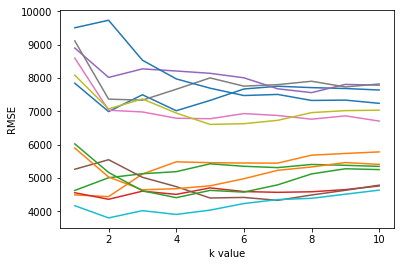

In [85]:
#Let's create a graph representing the level of rmse according to the value of k.
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

#So far the best feature is horsepower with 2 neighbors.